### for getting familiar with python, read appendix A of the pyomo reference book (p203)

In [ ]:
import pyomo.environ as pyo

# Simple Concrete model

In [18]:
model = pyo.ConcreteModel()

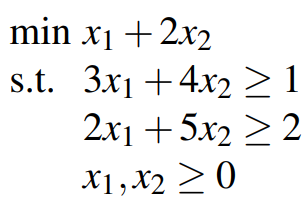

In [3]:
model.x_1 = pyo.Var(within=pyo.NonNegativeReals)
model.x_2 = pyo.Var(within=pyo.NonNegativeReals)

In [4]:
model.obj = pyo.Objective(expr=model.x_1 + 2*model.x_2)

In [5]:
model.con1 = pyo.Constraint(expr=3*model.x_1 + 4*model.x_2 >= 1)
model.con2 = pyo.Constraint(expr=2*model.x_1 + 5*model.x_2 >= 2)

# General Concrete model

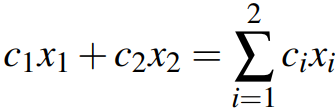

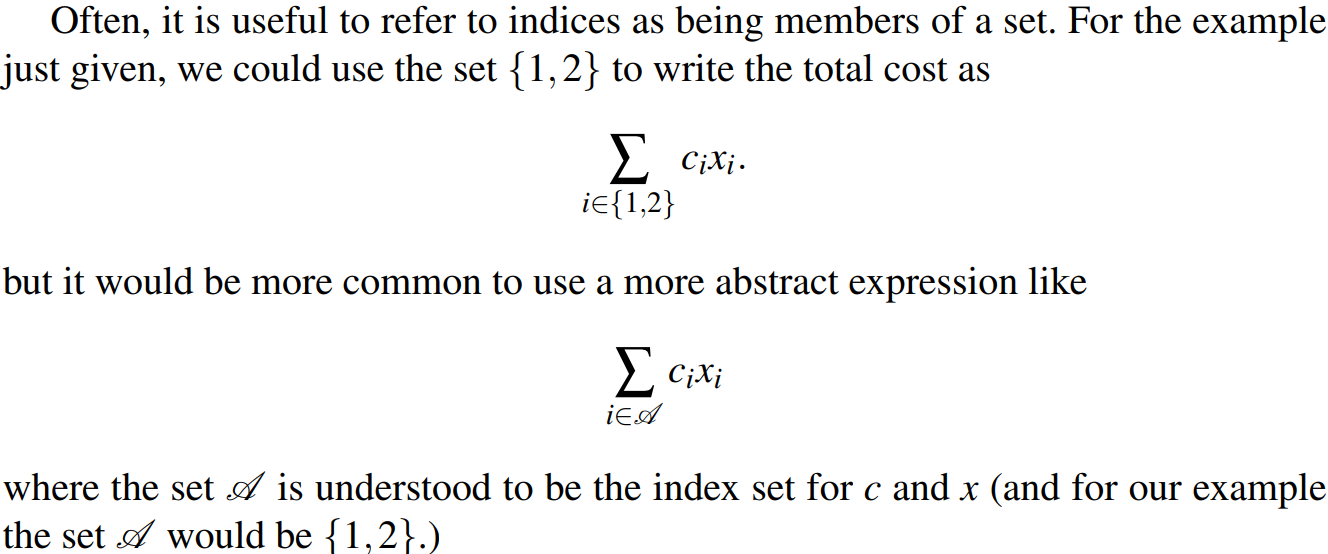

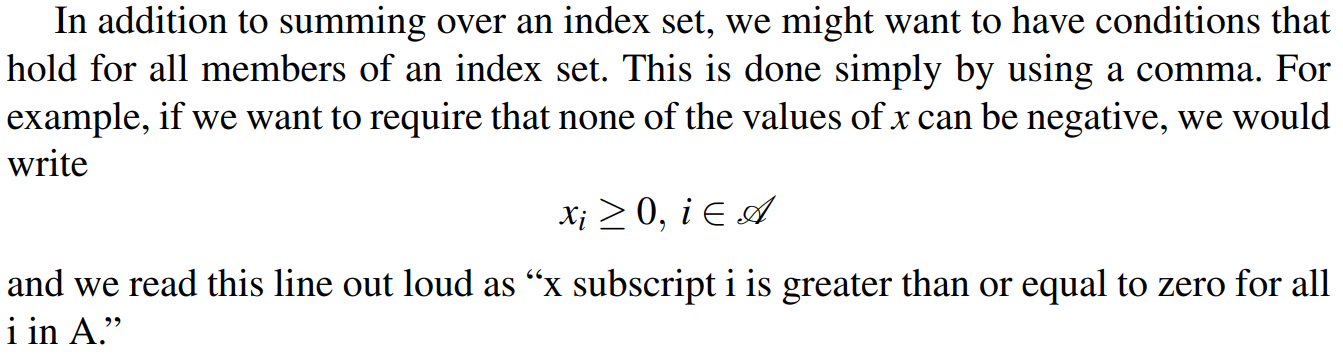

### a general LP optimization problem is demostrated below

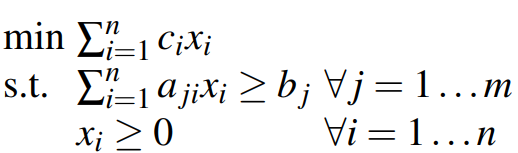

#### translate your model into the general structure

In [6]:
N = [1,2]                                # list: number of decision variables (i)
M = [1,2]                                # list: number of constraints        (j)
c = {1:1, 2:2}                           # dict: objective function coefficients (c_i)
a = {(1,1):3, (1,2):4, (2,1):2, (2,2):5} # dict: constraints' coefficients (j,i)=> jth cons, the coeff of ith var
b = {1:1, 2:2}                           # dict: right hand sides. 1:1 => RHS of the first constraint is 1

In [7]:
model = pyo.ConcreteModel()

In [8]:
model.x = pyo.Var(N, within=pyo.NonNegativeReals)

In [9]:
def obj_rule(model):
    return sum(c[i]*model.x[i] for i in N)

model.obj = pyo.Objective(rule = obj_rule)

In [10]:
def con_rule(model, j):
    return sum(a[j,i]*model.x[i] for i in N) >= b[j]

model.con = pyo.Constraint(M, rule = con_rule)

# General Abstract Model

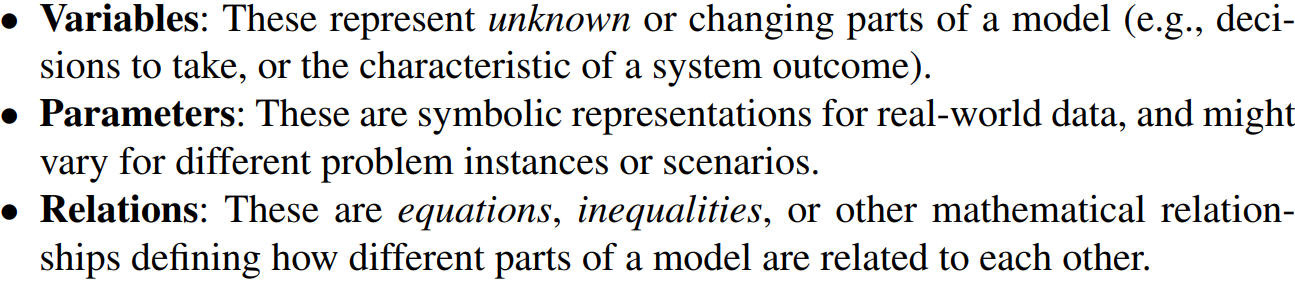

In [11]:
model = pyo.AbstractModel()

#### define sets

In [12]:
model.N = pyo.Set()
model.M = pyo.Set()

#### define parameters

In [13]:
model.a = pyo.Param(model.M, model.N)
model.b = pyo.Param(model.M)
model.c = pyo.Param(model.N)

#### define decision variables

In [14]:
model.x = pyo.Var(model.N, within = pyo.NonNegativeReals)

#### define objective function

In [15]:
def obj_rule(model):
    return sum(model.c[i]*model.x[i] for i in model.N)

model.obj = pyo.Objective(rule = obj_rule)

#### define constraints

In [16]:
def con_rule(model, j):
    return sum(model.a[j,i]*model.x[i] for i in model.N) >= model.b[j]

model.con = pyo.Constraint(model.M, rule = con_rule)